<a href="https://colab.research.google.com/github/AshHydroCoder/GRACE-Downscaler/blob/Branch1/GRACE_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyGRF

# Random Forest Model

In [3]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

path = '/content/drive/MyDrive/Thesis/RFM/Training'


# Load the CSV file, keeping 'time' as a regular column
df_ori = pd.read_csv(os.path.join(path, 'combined_csv.csv'))
df_ori['time'] = pd.to_datetime(df_ori['time'])
#df_ori = pd.read_csv(f'/content/drive/MyDrive/Thesis/Terai/{cluster}/combined_csv.csv')

# Exclude 'time', 'lat', and 'lon' from normalization
#columns_to_exclude = ['time', 'lat', 'lon','lwe_thickness']
#columns_to_normalize = df_ori.columns.difference(columns_to_exclude)

# Normalize only the selected columns
#scaler = MinMaxScaler()
#df_normalized = scaler.fit_transform(df_ori[columns_to_normalize])

# Create a new DataFrame with normalized data and reattach the excluded columns
#df_normalized = pd.DataFrame(df_normalized, columns=columns_to_normalize)
# Create a new DataFrame with normalized data and reattach the excluded columns
#df_normalized = pd.DataFrame(df_normalized, columns=columns_to_normalize)
#df = pd.concat([df_ori[columns_to_exclude], df_normalized], axis=1)
df = df_ori[(df_ori['time'].dt.year >= 2003) & (df_ori['time'].dt.year <= 2016)]
df = df.dropna()
df

,elevation,aspect,precipitation,time,lat,lon,SM,Evap_tavg,Qs_tavg,RadT_tavg,SWE_inst,lwe_thickness,_1_km_monthly_NDVI
7,92.0,215.10376,0.048318,2003-01-01,27.125,84.125,0.246873,0.000011,3.021868e-07,287.28473,0.0,13.324355,0.4809
8,155.0,246.60016,0.054042,2003-01-01,27.375,84.125,0.260472,0.000015,2.374596e-07,286.29984,0.0,7.766859,0.3711
9,163.0,211.87961,0.053233,2003-01-01,27.625,84.125,0.227755,0.000011,8.094548e-08,286.77960,0.0,7.766859,0.4655
16,75.0,146.30994,0.040677,2003-01-01,26.625,84.375,0.269152,0.000013,4.882270e-07,287.38257,0.0,11.498394,0.4438
17,82.0,161.56505,0.045491,2003-01-01,26.875,84.375,0.257972,0.000012,4.922684e-07,287.26010,0.0,13.324355,0.5689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23232,36.0,323.74615,0.000000,2016-12-01,25.375,87.125,0.323211,0.000015,4.849615e-12,290.85428,0.0,-16.726555,0.4927
23233,38.0,169.69516,0.000000,2016-12-01,25.625,87.125,0.325683,0.000015,5.544389e-12,290.77450,0.0,-16.726555,0.4848
23234,49.0,164.05460,0.000000,2016-12-01,25.875,87.125,0.325511,0.000015,4.486128e-12,291.03534,0.0,-16.726555,0.3611
23237,89.0,185.97930,0.001000,2016-12-01,26.625,87.125,0.314989,0.000017,9.331577e-12,291.56345,0.0,-23.664629,0.4010


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X =df.drop(['lwe_thickness','lat','lon','time','SWE_inst'], axis=1)
y = df['lwe_thickness']


In [38]:
X

,elevation,aspect,precipitation,SM,Evap_tavg,Qs_tavg,RadT_tavg,_1_km_monthly_NDVI
7,92.0,215.10376,0.048318,0.246873,0.000011,3.021868e-07,287.28473,0.4809
8,155.0,246.60016,0.054042,0.260472,0.000015,2.374596e-07,286.29984,0.3711
9,163.0,211.87961,0.053233,0.227755,0.000011,8.094548e-08,286.77960,0.4655
16,75.0,146.30994,0.040677,0.269152,0.000013,4.882270e-07,287.38257,0.4438
17,82.0,161.56505,0.045491,0.257972,0.000012,4.922684e-07,287.26010,0.5689
...,...,...,...,...,...,...,...,...
23232,36.0,323.74615,0.000000,0.323211,0.000015,4.849615e-12,290.85428,0.4927
23233,38.0,169.69516,0.000000,0.325683,0.000015,5.544389e-12,290.77450,0.4848
23234,49.0,164.05460,0.000000,0.325511,0.000015,4.486128e-12,291.03534,0.3611
23237,89.0,185.97930,0.001000,0.314989,0.000017,9.331577e-12,291.56345,0.4010


# K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the number of splits for K-Fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=21)

# Initialize the model
model = RandomForestRegressor()

# Perform cross-validation using all available cores (parallel computing)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1)

# Print the results
print("Cross-validation R2 scores:", scores)
print("Mean R2 score:", scores.mean())


KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Assuming X is your feature matrix
num_samples = X.shape[0]  # Get the total number of samples
k = 10  # Number of folds

# Calculate the size of each fold
fold_size = num_samples // k  # Integer division
remaining_samples = num_samples % k  # Remainder to account for any leftover samples

print(f"Total samples: {num_samples}")
print(f"Size of each fold: {fold_size}")

# If you want to see how many samples each fold will have
fold_sizes = [fold_size + 1 if i < remaining_samples else fold_size for i in range(k)]
print(f"Sizes of each fold: {fold_sizes}")


Total samples: 7200
Size of each fold: 720
Sizes of each fold: [720, 720, 720, 720, 720, 720, 720, 720, 720, 720]


In [ ]:
# Check feature importances
importances = model.fit(X, y).feature_importances_
print("Feature importances:", importances)


Feature importances: [0.09712563 0.13674423 0.11000457 0.37519609 0.05065912 0.01876992
 0.03117073 0.15777966 0.02255006]


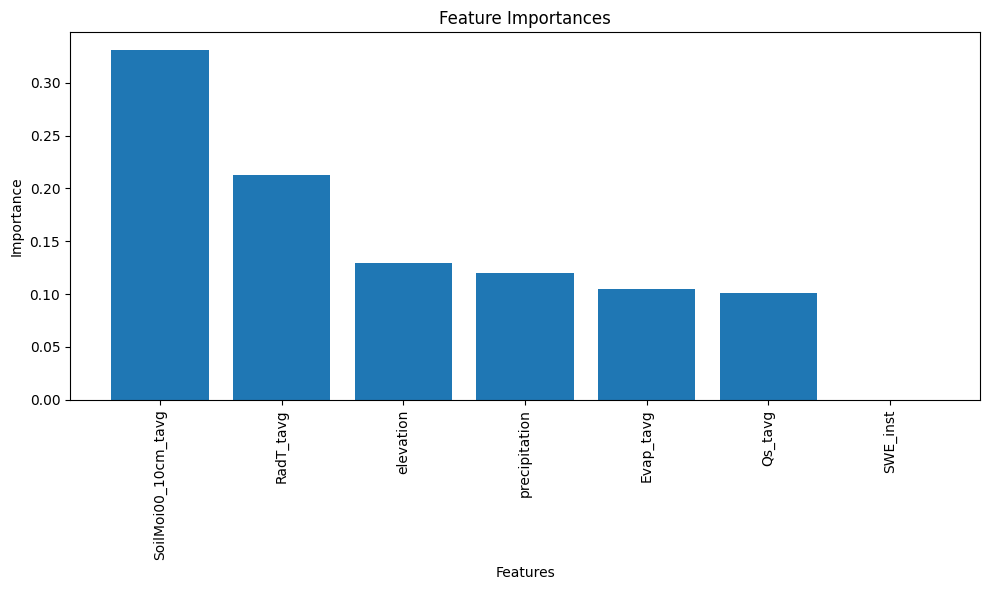

In [ ]:
# Plotting the feature importances
feature_names = X.columns
indices = np.argsort(importances)[::-1]  # Sort the features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Save the trained model to a file
import joblib
joblib.dump(model, '/content/drive/My Drive/Thesis/RFM/k-fold-RFM.pkl')
print("Model saved as 'random_forest_model.pkl'")

In [ ]:
import numpy as np

average_r2 = np.mean(scores)

print(f"R² Score for each fold: {[round(score, 4) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold: [0.6054, 0.6159, 0.608, 0.6015, 0.5942, 0.6028, 0.6099, 0.6083, 0.6085, 0.6049]
Average R² across 10 folds: 0.61


# Simple Split

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_rf = RandomForestRegressor(random_state = 2)
print(model_rf.get_params())  # change parameter as necessary (currently default)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


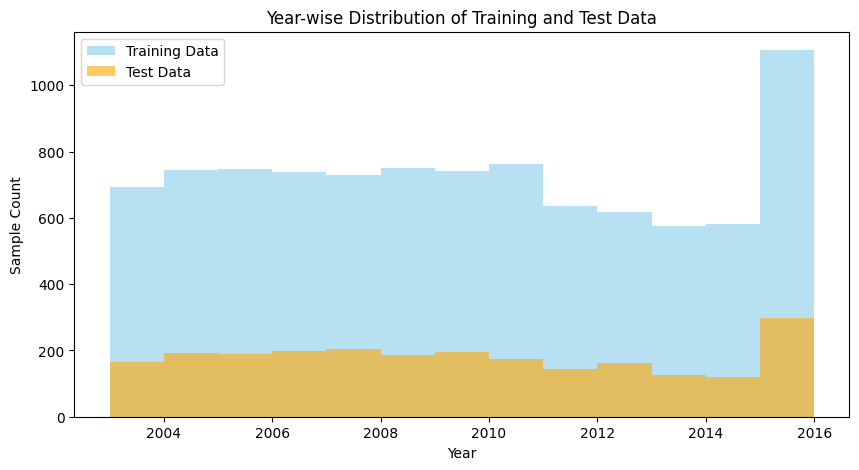

In [12]:
import matplotlib.pyplot as plt

train_times = df.loc[X_train.index]['time']
test_times = df.loc[X_test.index]['time']

plt.figure(figsize=(10, 5))
plt.hist(train_times.dt.year, bins=range(train_times.dt.year.min(), train_times.dt.year.max() + 1), alpha=0.6, label="Training Data", color="skyblue")
plt.hist(test_times.dt.year, bins=range(test_times.dt.year.min(), test_times.dt.year.max() + 1), alpha=0.6, label="Test Data", color="orange")
plt.title("Year-wise Distribution of Training and Test Data")
plt.xlabel("Year")
plt.ylabel("Sample Count")
plt.legend()
plt.show()



In [13]:
df_train = df.loc[X_train.index]
yearly_mean = df_train.groupby(df_train['time'].dt.year)['lwe_thickness'].mean()
print(yearly_mean)


time
2003    13.641610
2004     9.261297
2005     2.481148
2006    -3.267756
2007     0.634124
2008     0.793916
2009    -9.531445
2010   -13.598553
2011    -8.721841
2012   -14.808080
2013   -15.941868
2014   -12.449791
2015   -15.653981
2016   -22.433010
Name: lwe_thickness, dtype: float64


In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

# Perform cross-validation
mse_scores = []

for train_index, test_index in tscv.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model
    model = RandomForestRegressor(random_state=21)
    model.fit(X_train_cv, y_train_cv)

    # Predict and evaluate
    y_pred = model.predict(X_test_cv)
    mse = mean_squared_error(y_test_cv, y_pred)
    print(f"MSE: {mse}")
    mse_scores.append(mse)

print("Mean MSE across TimeSeries splits:", sum(mse_scores) / len(mse_scores))



MSE: 127.54184543771339
MSE: 108.924821663451
MSE: 88.63067805295732
MSE: 88.61537873065721
MSE: 85.00447848985206
MSE: 83.7625625696191
MSE: 71.54650081719771
MSE: 83.92499888845826
MSE: 70.04713239510444
MSE: 68.6345449546514
Mean MSE across TimeSeries splits: 87.66329419996619


In [40]:
X_train_columns = X_train.columns.tolist()
print(X_train_columns)

['elevation', 'aspect', 'precipitation', 'SM', 'Evap_tavg', 'Qs_tavg', 'RadT_tavg', '_1_km_monthly_NDVI']


In [41]:
#train model

model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [19]:
import joblib
joblib.dump(model, f'/content/drive/My Drive/Thesis/RFM/RFM_CV.pkl')

['/content/drive/My Drive/Thesis/RFM/RFM_CV.pkl']

## Import RFM

In [10]:
import joblib
model_rf = joblib.load('/content/drive/My Drive/Thesis/RFM/RFM.pkl')

In [42]:
model_rf.score(X_test,y_test)


0.7611995993553544

In [43]:
model_rf.score(X_train,y_train)

0.9663165155976603

In [44]:
y_predicted = model_rf.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_predicted)
print("Mean Absolute Error:", mae)


# Calculate Nash-Sutcliffe Efficiency coefficient
nse = 1 - (np.sum((y_test - y_predicted)**2) / np.sum((y_test - np.mean(y_test))**2))
print("Nash-Sutcliffe Efficiency:", nse)

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(y_test, y_predicted)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

rmse = np.sqrt(mse)
nrmse = rmse / (np.max(y_test) - np.min(y_test))
print("Normalized Root Mean Square Error:", rmse)

Mean Squared Error: 70.4837124850533
Mean Absolute Error: 5.999322682526539
Nash-Sutcliffe Efficiency: 0.7611995993553544
Pearson Correlation Coefficient: 0.8729619707364467
Normalized Root Mean Square Error: 8.395457848447178


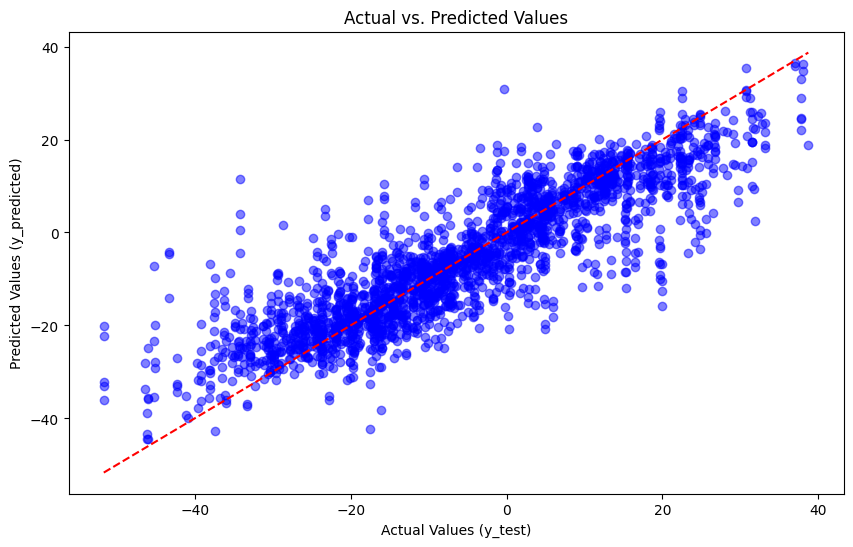

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, color='blue', alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predicted)')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

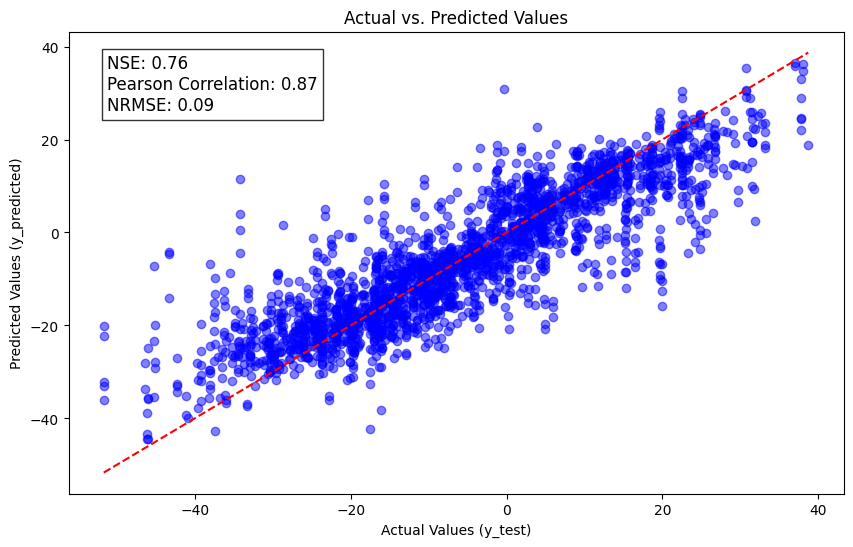

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os

# Calculate metrics
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
nrmse = rmse / (np.max(y_test) - np.min(y_test))

# Calculate Nash-Sutcliffe Efficiency coefficient
nse = 1 - (np.sum((y_test - y_predicted)**2) / np.sum((y_test - np.mean(y_test))**2))

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(y_test, y_predicted)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, color='blue', alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predicted)')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add metrics to the plot
text_metrics = f"NSE: {nse:.2f}\nPearson Correlation: {correlation_coefficient:.2f}\nNRMSE: {nrmse:.2f}"
plt.text(0.05, 0.95, text_metrics, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()




### Feature Importance

              Feature  Importance
3                  SM    0.542476
6           RadT_tavg    0.121228
2       precipitation    0.090523
5             Qs_tavg    0.082554
4           Evap_tavg    0.065875
0           elevation    0.045291
7  _1_km_monthly_NDVI    0.033709
1              aspect    0.018343


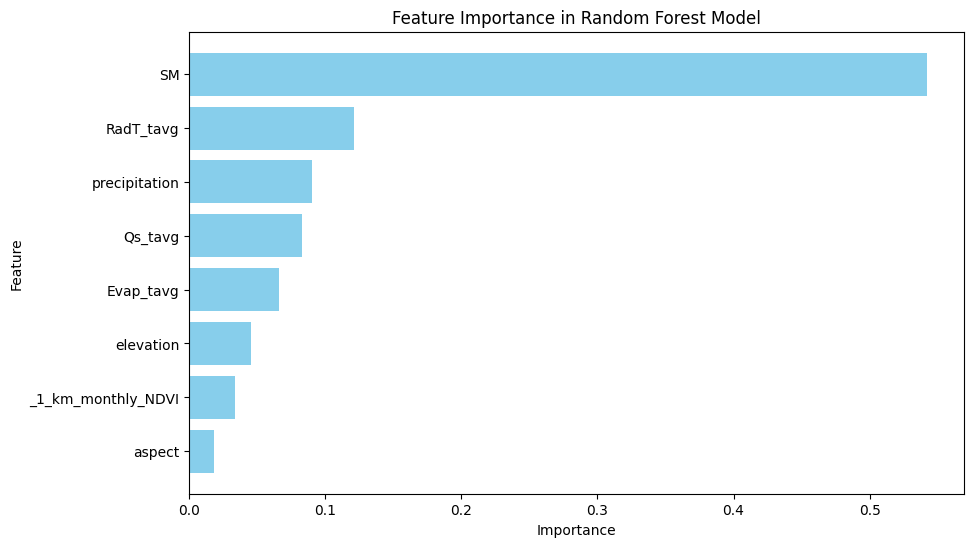

In [48]:
importances = model_rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

### Correlation among variables

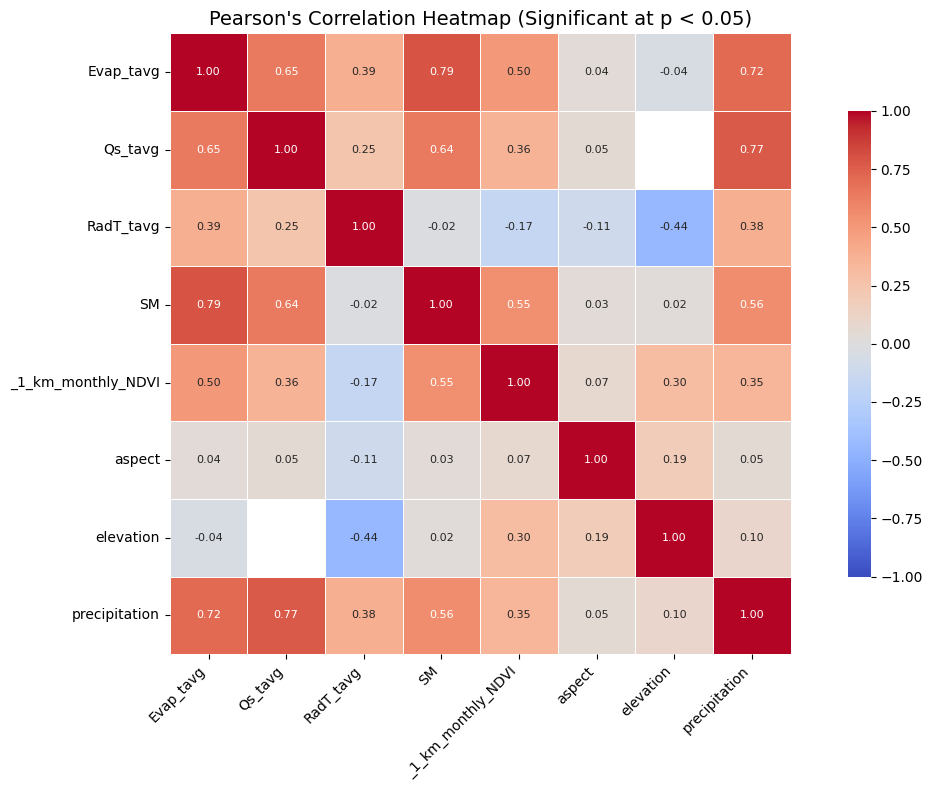

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Function to calculate Pearson's correlation and p-values
def calculate_pearsonr(df):
    # Create empty DataFrames to store correlation and p-values
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    p_value_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    # Loop through columns and calculate Pearson's correlation coefficient and p-values
    for col1 in df.columns:
        for col2 in df.columns:
            corr, p_value = pearsonr(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = p_value

    # Convert to numeric type (floating point)
    corr_matrix = corr_matrix.astype(float)
    p_value_matrix = p_value_matrix.astype(float)

    return corr_matrix, p_value_matrix

# Exclude 'time', 'lat', 'lon', 'lwe_thickness' (if needed for visualization)
df_analysis = df.drop(columns=['time', 'lat', 'lon', 'lwe_thickness','SWE_inst'])

# Calculate correlation and p-values
corr_matrix, p_value_matrix = calculate_pearsonr(df_analysis)

# Create a mask for significant correlations (p < 0.05)
significance_mask = p_value_matrix < 0.05

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=~significance_mask,
            square=True, linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .75},
            annot_kws={"size": 8}, fmt=".2f")

# Set titles and labels
plt.title("Pearson's Correlation Heatmap (Significant at p < 0.05)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [19]:
# Random Forest model
rf = RandomForestRegressor(random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [10, 20, None],          # Depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                            cv=5, scoring='neg_mean_squared_error',
                            n_jobs=-1, verbose=2)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

# GRF

In [ ]:
# Packages
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score

import PyGRF

In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

path = '/content/drive/MyDrive/Thesis/RFM/Training'

# Load the CSV file, keeping 'time' as a regular column
df_ori = pd.read_csv(os.path.join(path, 'combined_csv.csv'))

# Convert 'time' column to datetime format if it's not already
df_ori['time'] = pd.to_datetime(df_ori['time'])

# Filter data to keep only years 2003 to 2005
df_filtered = df_ori[(df_ori['time'].dt.year == 2003)]



# Drop any remaining NaN values
df = df_filtered.dropna()

df


,elevation,aspect,precipitation,time,lat,lon,SM,Evap_tavg,Qs_tavg,RadT_tavg,SWE_inst,lwe_thickness,_1_km_monthly_NDVI
7,92.0,215.10376,0.048318,2003-01-01,27.125,84.125,0.246873,0.000011,3.021868e-07,287.28473,0.0,13.324355,0.4809
8,155.0,246.60016,0.054042,2003-01-01,27.375,84.125,0.260472,0.000015,2.374596e-07,286.29984,0.0,7.766859,0.3711
9,163.0,211.87961,0.053233,2003-01-01,27.625,84.125,0.227755,0.000011,8.094548e-08,286.77960,0.0,7.766859,0.4655
16,75.0,146.30994,0.040677,2003-01-01,26.625,84.375,0.269152,0.000013,4.882270e-07,287.38257,0.0,11.498394,0.4438
17,82.0,161.56505,0.045491,2003-01-01,26.875,84.375,0.257972,0.000012,4.922684e-07,287.26010,0.0,13.324355,0.5689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,36.0,323.74615,0.013193,2003-12-01,25.375,87.125,0.326499,0.000014,1.157442e-08,290.37160,0.0,19.552588,0.4820
1673,38.0,169.69516,0.015106,2003-12-01,25.625,87.125,0.328074,0.000014,4.335789e-09,290.29670,0.0,19.552588,0.4409
1674,49.0,164.05460,0.017983,2003-12-01,25.875,87.125,0.323997,0.000013,8.298077e-09,290.46338,0.0,19.552588,0.4110
1677,89.0,185.97930,0.027939,2003-12-01,26.625,87.125,0.312934,0.000017,3.930784e-09,290.22903,0.0,24.203798,0.3964


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
y = df['lwe_thickness']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [ ]:
bandwidth, local_weight, p_value = PyGRF.search_bw_lw_ISA(X_train["lwe_thickness"], X_train[['lat', 'lon']],bw_min = 10, bw_max = 30,step=1)

/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


bandwidth: 19, moran's I: -0.023286667939212257, p-value: 0.03935447947053567


In [ ]:
X_columns = ['Evap_tavg', 'Qs_tavg', 'RadT_tavg', 'SM', '_1_km_monthly_NDVI', 'aspect', 'elevation', 'precipitation']
bw = PyGRF.search_bandwidth(X_train[X_columns],X_train['lwe_thickness'],X_train[['lat', 'lon']],n_estimators=60, max_features=1,bw_min = 10,bw_max=100,step=10,train_weighted=False,n_jobs=-1,random_state=21)

bandwidth: 10 mixed: 0.4849
bandwidth: 20 mixed: 0.5948
bandwidth: 30 mixed: 0.5206
bandwidth: 40 mixed: 0.4983
bandwidth: 50 mixed: 0.5041
bandwidth: 60 mixed: 0.493
bandwidth: 70 mixed: 0.5065
bandwidth: 80 mixed: 0.477
bandwidth: 90 mixed: 0.5462
bandwidth: 100 mixed: 0.5261
Best Bandwidth:  20.0


In [ ]:
# function for standarizing independent variables
def standarize_data(data, stats):
    return (data - stats['mean']) / stats['std']

In [ ]:
# get columns for only dependent variables
X_columns = ['Evap_tavg', 'Qs_tavg', 'RadT_tavg', 'SM', '_1_km_monthly_NDVI', 'aspect', 'elevation', 'precipitation']

y_predict = []
y_true = []
df_local_fi = pd.DataFrame()
df_global_fi = pd.DataFrame()

K_fold = KFold(n_splits=5, shuffle=True, random_state=42)

i = 0
for train_index, test_index in K_fold.split(df):
    print("fold:", i)

    # get the training and test data in each fold
    X_train_all, X_test_all = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = X_train_all['lwe_thickness'], X_test_all['lwe_thickness']
    X_train = X_train_all[X_columns]
    X_test = X_test_all[X_columns]
    xy_coord = X_train_all[['lat', 'lon']]
    coords_test = X_test_all[['lon', 'lat']]

    # standarize independent variables
    training_stat = X_train.describe().transpose()
    X_scaled_train = standarize_data(X_train, training_stat)
    X_scaled_test = standarize_data(X_test, training_stat)

    # create a PyGRF model
    pygrf = PyGRF.PyGRFBuilder(n_estimators=60, max_features=1, band_width=19, train_weighted=True, predict_weighted=True, bootstrap=False,
                          resampled=True, random_state=42)

    # fit the model and use it to make predictions
    pygrf.fit(X_scaled_train, y_train, xy_coord)
    predict_combined, predict_global, predict_local = pygrf.predict(X_scaled_test, coords_test, local_weight=-0.023)

    # get the feature importance output by local models
    local_fi = pygrf.get_local_feature_importance()
    df_local_fi = pd.concat([df_local_fi, local_fi])

    # get the feature importance output by the global random forest model
    global_fi = pygrf.global_model.feature_importances_
    df_global_fi = pd.concat([df_global_fi, pd.DataFrame(data=global_fi.reshape(1, -1), columns=X_columns)])

    y_predict = y_predict + predict_combined
    y_true = y_true + y_test.tolist()

    i = i + 1

fold: 0


/usr/local/lib/python3.11/dist-packages/PyGRF/PyGRF.py:319: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance_df = pd.concat([feature_importance_df, pd.DataFrame([this_row], columns=column_list)], ignore_index=True)


fold: 1


/usr/local/lib/python3.11/dist-packages/PyGRF/PyGRF.py:319: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance_df = pd.concat([feature_importance_df, pd.DataFrame([this_row], columns=column_list)], ignore_index=True)


fold: 2


/usr/local/lib/python3.11/dist-packages/PyGRF/PyGRF.py:319: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance_df = pd.concat([feature_importance_df, pd.DataFrame([this_row], columns=column_list)], ignore_index=True)


fold: 3


/usr/local/lib/python3.11/dist-packages/PyGRF/PyGRF.py:319: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance_df = pd.concat([feature_importance_df, pd.DataFrame([this_row], columns=column_list)], ignore_index=True)


fold: 4


/usr/local/lib/python3.11/dist-packages/PyGRF/PyGRF.py:319: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance_df = pd.concat([feature_importance_df, pd.DataFrame([this_row], columns=column_list)], ignore_index=True)


In [ ]:
# compute the RMSE and r-square
rmse = mean_squared_error(y_true, y_predict)
r2 = r2_score(y_true, y_predict)
print("rmse: " + str(round(rmse, 4)), "r2: " + str(round(r2, 4)))

rmse: 9.5025 r2: 0.9457


In [ ]:
# show the local feature importance
print(df_local_fi.shape)
df_local_fi.head()
df_local_fi

(3432, 9)


,model_index,Evap_tavg,Qs_tavg,RadT_tavg,SM,_1_km_monthly_NDVI,aspect,elevation,precipitation
0,0,0.220498,0.167054,0.201316,0.146780,0.180122,3.987780e-15,2.991264e-15,0.084231
1,1,0.184892,0.153819,0.148677,0.175677,0.176249,4.736348e-15,4.300829e-15,0.160685
2,2,0.199906,0.156786,0.138901,0.146882,0.189989,3.599229e-03,1.252534e-03,0.162685
3,3,0.178873,0.149098,0.239746,0.153943,0.132882,2.812063e-15,1.148160e-03,0.144309
4,4,0.140610,0.157676,0.204880,0.183143,0.203532,3.669820e-15,3.176546e-15,0.110158
...,...,...,...,...,...,...,...,...,...
682,682,0.200059,0.184285,0.161623,0.152842,0.142587,4.833473e-15,2.654490e-15,0.158603
683,683,0.190109,0.178295,0.124741,0.178751,0.081268,1.888605e-03,9.964078e-04,0.243951
684,684,0.200479,0.183665,0.155513,0.152484,0.124067,6.664012e-15,3.496002e-15,0.183792
685,685,0.182059,0.158715,0.183017,0.149439,0.130428,2.000328e-15,1.417154e-15,0.196341


In [ ]:
# show the global feature importance
print(df_global_fi.shape)
df_global_fi.head()

(5, 8)


,Evap_tavg,Qs_tavg,RadT_tavg,SM,_1_km_monthly_NDVI,aspect,elevation,precipitation
0,0.169334,0.169770,0.183626,0.194033,0.079109,0.014325,0.021925,0.167878
0,0.198235,0.172577,0.181390,0.158045,0.072981,0.013198,0.025212,0.178363
0,0.187913,0.173171,0.177829,0.173582,0.079154,0.013763,0.023349,0.171238
0,0.186106,0.163166,0.169557,0.179599,0.076807,0.012840,0.020846,0.191079
0,0.193168,0.170831,0.174749,0.173080,0.076531,0.012971,0.023440,0.175230


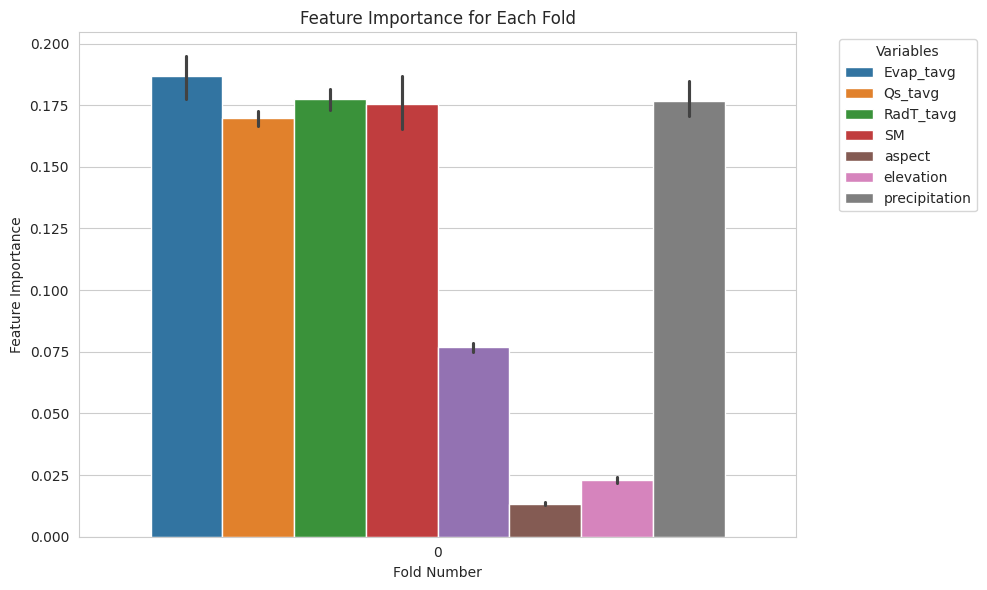

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Melt the df_global_fi to have one row per fold and variable for easier plotting
df_global_fi_melted = df_global_fi.reset_index().melt(id_vars=['index'], value_vars=df_global_fi.columns)

# Rename columns for clarity
df_global_fi_melted.columns = ['Fold', 'Variable', 'Importance']

# Plotting the data
sns.barplot(data=df_global_fi_melted, x='Fold', y='Importance', hue='Variable')

# Add labels and title
plt.xlabel('Fold Number')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Each Fold')
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import os
path = '/content/drive/MyDrive/Thesis/RFM/Training'


# Load the CSV file, keeping 'time' as a regular column
df_ori = pd.read_csv(os.path.join(path, 'combined_csv.csv'))
df_ori['time'] = pd.to_datetime(df_ori['time'])
df = df_ori[(df_ori['time'].dt.year >= 2003) & (df_ori['time'].dt.year <= 2005)]
df = df_ori.dropna()

X_columns = ['Evap_tavg', 'Qs_tavg', 'RadT_tavg', 'SM', '_1_km_monthly_NDVI', 'aspect', 'elevation', 'precipitation']

# Define the target variable (y) and the independent variables (X)
y = df['lwe_thickness']
X = df[X_columns]  # Drop the target variable from the features

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=60, max_features=1, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 139.4128106816419
R² Score: 0.5949244727428851


##Single GRF Model

In [ ]:
# function for standarizing independent variables
def standarize_data(data, stats):
    return (data - stats['mean']) / stats['std']

In [ ]:
import PyGRF
y_predict = []
y_true = []
df_local_fi = pd.DataFrame()
df_global_fi = pd.DataFrame()

X_columns = ['Evap_tavg', 'Qs_tavg', 'RadT_tavg', 'SM', '_1_km_monthly_NDVI', 'aspect', 'elevation', 'precipitation']

# Define the target variable (y) and the independent variables (X)
y = df['lwe_thickness']
X = df.drop(columns=['lwe_thickness'])

# Split the data into training and testing sets (80% train, 20% test)
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train_all[X_columns]
X_test = X_test_all[X_columns]
xy_coord = X_train_all[['lat', 'lon']]
coords_test = X_test_all[['lon', 'lat']]
training_stat = X_train.describe().transpose()
X_scaled_train = standarize_data(X_train, training_stat)
X_scaled_test = standarize_data(X_test, training_stat)


pygrf = PyGRF.PyGRFBuilder(n_estimators=60, max_features=1, band_width=19, train_weighted=False, predict_weighted=True, bootstrap=False,
                          resampled=True, random_state=42)



In [ ]:
pygrf.fit(X_scaled_train, y_train, xy_coord)


In [ ]:
predict_combined, predict_global, predict_local = pygrf.predict(X_scaled_test, coords_test, local_weight=-0.023)

In [ ]:
# compute the RMSE and r-square
rmse = mean_squared_error(y_test, predict_combined)
r2 = r2_score(y_test, predict_combined)
print("rmse: " + str(round(rmse, 4)), "r2: " + str(round(r2, 4)))

rmse: 133.7054 r2: 0.6115


In [ ]:
# get the feature importance output by local models
local_fi = pygrf.get_local_feature_importance()
df_local_fi = pd.concat([df_local_fi, local_fi])

/usr/local/lib/python3.11/dist-packages/PyGRF/PyGRF.py:319: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance_df = pd.concat([feature_importance_df, pd.DataFrame([this_row], columns=column_list)], ignore_index=True)


In [ ]:
global_fi = pygrf.global_model.feature_importances_
df_global_fi = pd.concat([df_global_fi, pd.DataFrame(data=global_fi.reshape(1, -1), columns=X_columns)])

# Optuna

# XGBoost